<figure>
  <IMG src="figures/logo-esi-sba.png" WIDTH=300 height="100" ALIGN="right">
</figure>

# Practical Trainining Series on Modeling And Simulation   
*By Dr. Belkacem KHALDI (b.khaldi@esi-sba.dz)*

## Notebook 4: Modeling Dynamical Systems
In this Notebook you learn how to deal with Dynamical Systems Modeling and Simulation. Dynamical systems are widely encountred in real life and are mostely modeled using Ordinary Differential Equations (ODEs). Many of the functions we will use are included in the `scipy` and `sympy` python packages. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sy
import numpy as np
from scipy.integrate import odeint

### 1- Simulating Discrete-Time First-order Systems
Discrete-time models assume that time proceeds in a step-wise manner. These type of dynamical systems are described by recurrence relations.

A  System is called a First-order system if it is modeld with a difference equation whose rules involve state variables of the immediate past time (at timet−1).

#### Example (Exponential Population Growth):
The Exponential Population Model is a Standard Model Describing the Growth of a Single Population. The easiest way to capture the idea of a growing population is with a single celled organism, such as a bacterium or a cilliate. In Figure 1, a population of Paramecium in a small laboratory depression slide is pictured. In this population the individuals divide once per day. So, starting with a single individual at day 0, we expect, in successive days, 2, 4, 8, 16, 32, and 64 individuals in the population. 
<figure>
  <IMG src="figures/vandermeer_figure1_ksm.jpeg" WIDTH=300 height="100" ALIGN="right">
</figure>

We can see here that, on any particular day, the number of individuals in the population is simply twice what the number was the day before. 

This model is a simple exponential population growth model governed by the following difference equation model:
 $N_t = a.N_{t−1}$, where $a$ is the rate of  population  generation.
    
The General mathematic solution for this model is: $.N_0 a^t$, where $N_0$ is the initial population. This can be confirmed using the `sympy`   python library (https://www.sympy.org/) as follows:

In [102]:
from sympy import Function,rsolve
import sympy as sy

#To activate Latex format printing
sy.init_printing()
 
#Function and variables Declarations
N = sy.Function('N')
t,a,N0 = sy.symbols('t a N0')
#Equation definition
f = N(t+1) - a * N(t)
#Solving the refernce equation
sol = sy.rsolve(f, N(t), {N(0):N0})
#Printing the solution
sol

Now let's numerically simulate this model with an initial poupation $N_0=1.0$ and rate $a=2.0$:

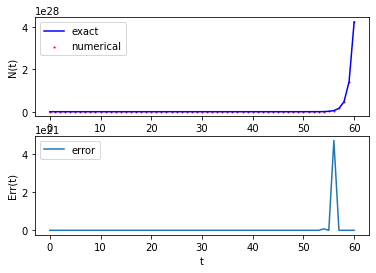

In [107]:
import matplotlib.pyplot as plt
import numpy as np

N_0 = 1.0 #initial gen.
a   = 3.0 #rate of  pop. gen.
N_t = 59  #Max Time steps
#generate time steps
t = np.linspace(0, (N_t+1), (N_t+2))
#Initialize N with 0
N = np.zeros(N_t+2) 
#Set N[0] to N_0
N[0] = N_0
#Exact Solution
E=N_0*np.power(a,t)
#Solve Numerically
for n in range(N_t+1):
    N[n+1] =  N[n] * a

#Plotting(solution)
fig, axs = plt.subplots(2)
axs[0].scatter(x=t, y=N,  c= 'r', s=1, label='numerical')
axs[0].plot(t,E , 'b',label='exact')
axs[0].legend(loc='upper left')
axs[0].set(xlabel='t', ylabel='N(t)')
axs[1].plot(t,(E-N)**2,label='error')
axs[1].legend(loc='upper left')
axs[1].set(xlabel='t', ylabel='Err(t)')
plt.show()

Not here the square error isalmost zero. Try with differnt value of $a$. For example, $a=1.1$

### Challenge 1:
We want to simulate the population growth in bacteria. Bacteria are prokaryotes that reproduce by prokaryotic fission. This division takes about an hour for many bacterial species. Assume that 1000 bacteria are placed in a large flask with an unlimited supply of nutrients (so the nutrients will not become depleted), after an hour there will be one round of division (with each organism dividing once), resulting in 2000 organisms. In another hour, each of the 2000 organisms will double, producing 4000; after the third hour, there should be 8000 bacteria in the flask; and so on. 

<ol type = "1">
         <li>Simulate the above model for a total 72 hours using python and plot the exact and numerical solutions as well as the  square error (use the python code above as a staring point).
</li>
         <li>What will be the total number of bacteria in Hour=15</li>     
</ol>

#### Hint
Note that this system is governed by the following equation: $P_h=r.P_{h-1}$. Where $r$ is the rate of the population growth and $P_h$ is the actual number of population at hour $h$.

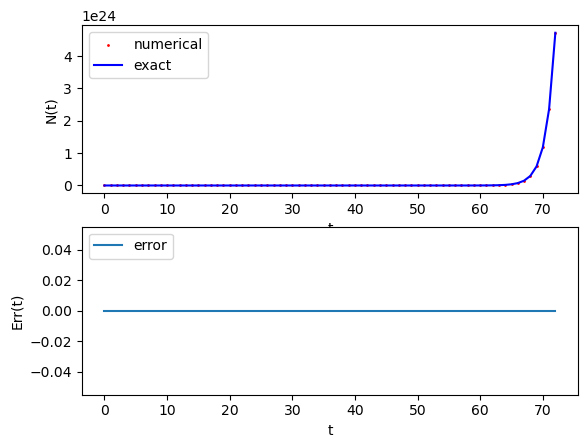

Le nombre de bactéries à l'heure 15 est : 32768000.0


In [ ]:

import matplotlib.pyplot as plt
import numpy as np

N_0 = 1000 #initial gen.
a   = 2.0 #rate of  pop. gen.
N_t = 72  #Max Time steps
#generate time steps
t = np.linspace(0, (N_t), (N_t+1))
#Initialize N with 0
N = np.zeros(N_t+1) 
#Set N[0] to N_0
N[0] = N_0
#Exact Solution
E=N_0*np.power(a,t)
#Solve Numerically
for n in range(1,N_t+1):
    N[n] =  N[n-1] * a

#Plotting(solution)
fig, axs = plt.subplots(2)
axs[0].scatter(x=t, y=N,  c= 'r', s=1, label='numerical')
axs[0].plot(t,E , 'b',label='exact')
axs[0].legend(loc='upper left')
axs[0].set(xlabel='t', ylabel='N(t)')
axs[1].plot(t,(E-N)**2,label='error')
axs[1].legend(loc='upper left')
axs[1].set(xlabel='t', ylabel='Err(t)')
plt.show()

N_15 = N[15]
print(f"Le nombre de bactéries à l'heure 15 est : {N_15}")

### 2- Simulating Continuous Time dynamical Systems
Continuous Time Dynamical systems are usually described using differential equation models, specifically ordinary differential equations (ODE).

#### 2.1- ODEs - 1D Autonomous Equations 
#### Example: Exponential Population Growth System
Now we consider the simple exponential population growth system modeled by the 1st-order autonomous model:
$\frac{d x}{d t}= x$.
A general mathematical solution for this system can be found using `sympy`  python library as follows:

In [108]:
import sympy as sy
sy.init_printing()
# declare math. symbols used in Eq 
t = sy.symbols('t')
f = sy.Function('x')
# Solve the equation f'(t) = x(t)
diffEq = f(t).diff(t) - f(t)
sy.dsolve(diffEq, f(t))

Then the numerical solution is gotten using the `scipy.odeint` funstion. In the code bellow, we plot both the exact and numerical solutions. To plot the numerical solution, an initial condition  should be given as a parameter when calling the `odeint` function (In this example: y0=0.5). To plot the exact solution gotten from the `sympy` package, we call the `lamdify` function to transform sympy expression equations to lambda functions which can be used to calculate numerical values very fast.

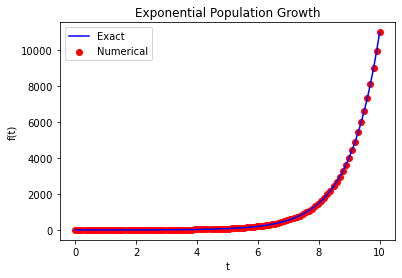

In [109]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt 

from scipy.integrate import odeint

sy.init_printing()

def PopGrowth(x, time):
    return x
# declare math. symbols used in Eq 


def ExactSol(time_arr,IC):
    t = sy.symbols('t')
    f = sy.Function('x')
    # Solve the equation f'(t) = x(t)
    diffEq = f(t).diff(t) - f(t)
    solve=sy.dsolve(diffEq, f(t), ics = {f(0): IC})
    #Get the exact numerical solution
    func = sy.lambdify(t, solve.rhs,'numpy') 
    yvals = func(time_arr)
    return yvals

#Get the numerical solution using odeint for initial Value IV
def NumericalSol(time_arr,IV):
    yvals = odeint(PopGrowth, IV, time_arr)
    return yvals


x0 = 0.5 # an initial condition, 
ts = np.linspace(0.0, 10.0, 100) # values of independent variable
#comppute exact and numerical solutions
yexact=ExactSol(ts,x0)
ynum=NumericalSol(ts,x0)

#Plotting results
plt.scatter(ts,ynum, label='Numerical', color='r')
plt.plot(ts, yexact,label='Exact', color='b' )
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Exponential Population Growth')
plt.legend()
plt.show()

### Challenge 2: Logistic Population Growth System
Consider the logistic population growth system seen in the course. This system is modeled by the 1st-order autonomous model:
$\frac{d x}{d t}=x(1- x)$
A general mathematical solution for this system can be found using `sympy`  python library as follows:

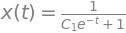

In [1]:
import sympy as sy
sy.init_printing()
# declare math. symbols used in Eq 
t = sy.symbols('t')
f = sy.Function('x')
# Solve the equation f'(t) = x(t)*(1-x(t))
diffEq = f(t).diff(t) - f(t)*(1-f(t))
sy.dsolve(diffEq, f(t))

<ol type = "1">
 <li>Using the  2nd  code of the Exponential Population Growth, plots both the numerical and exact solutions for this system with a initial condition $x_0=0.75$.
</li>
 <li>Plot in another jupyter cell the solutions for 25 initial conditions starting from 0 and ending by 3.0.</li>    
  <li>Identify the equilibrium positions for this solution. Note that the equilibrium solutions are where the derivative is equal to zero </li>
 <li>Identify the stable and unstable equilibrium point. Note that the stable point is where the solution curves converge to that point. Whereas, the unstable point is the opposit</li>
</ol>



#### Hint
You hve to change the `PopGrowth` return function as well as to adjust the `ExactSol` function accordingly.


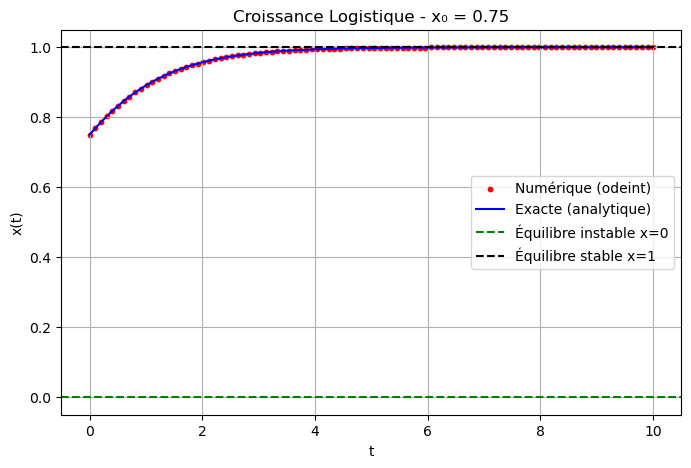

In [2]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

sy.init_printing()

# Définition de l'équation différentielle dx/dt = x (1 - x)
def PopGrowth(x, t):
    return x * (1 - x)

# Résolution exacte de l'équation différentielle
def ExactSol(time_arr, IC):
    t = sy.symbols('t')
    f = sy.Function('x')

    # Équation différentielle dx/dt = x(1-x)
    diffEq = f(t).diff(t) - f(t) * (1 - f(t))
    
    # Résolution avec condition initiale x(0) = IC
    solve = sy.dsolve(diffEq, f(t), ics={f(0): IC})
    
    # Convertir la solution symbolique en fonction Python utilisable
    func = sy.lambdify(t, solve.rhs, 'numpy')
    yvals = func(time_arr)
    
    return yvals

# Résolution numérique avec odeint
def NumericalSol(time_arr, IV):
    yvals = odeint(PopGrowth, IV, time_arr)
    return yvals.flatten()  # Conversion en tableau 1D pour compatibilité

# Condition initiale x(0) = 0.75
x0 = 0.75  
ts = np.linspace(0.0, 10.0, 100)  # Temps de simulation

# Calcul des solutions
yexact = ExactSol(ts, x0)
ynum = NumericalSol(ts, x0)

# Tracé des résultats
plt.figure(figsize=(8, 5))

plt.scatter(ts, ynum, label='Numérique (odeint)', color='r', s=10)
plt.plot(ts, yexact, label='Exacte (analytique)', color='b')

# Ajout des lignes d'équilibre
plt.axhline(y=0, color='g', linestyle='--', label='Équilibre instable x=0')
plt.axhline(y=1, color='k', linestyle='--', label='Équilibre stable x=1')

plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Croissance Logistique - x₀ = 0.75')
plt.legend()
plt.grid()
plt.show()


Text(0, 0.5, '$y$')

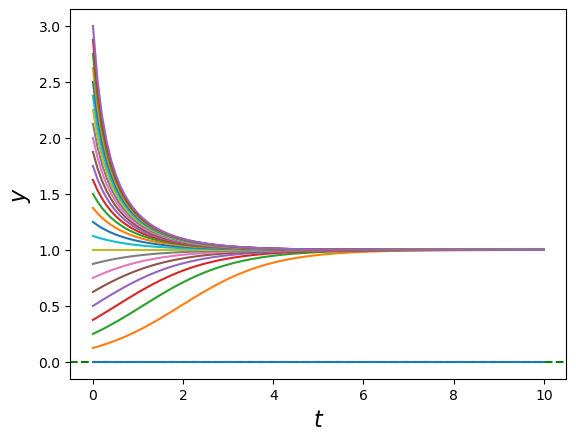

In [3]:
# Plot curves for several initial conditions
ics = np . linspace (0.0 , 3.0 , 25) # a list of initial conditions
plt.axhline(y=0, color='g', linestyle='--', label='Équilibre x=0')
for x0 in ics :
    xs = NumericalSol(ts, x0)
    plt.plot(ts,xs)
plt.xlabel('$t$', fontsize=16)
plt.ylabel('$y$', fontsize=16)

### Challenge 3:
A population of insects in a region will grow every day at a rate, $r=0.0785$, that is proportional to their current population. In the absence of any outside factors the population will triple in two weeks time. On any given day there is a net migration into the area of 15 insects and 16 are eaten by the local bird population and 7 die of natural causes. 
Simulate this model and plot the population growth model for a total duration of 60 days with an initial population of 100 insects in the area.  Will the population survive? If not, when do they die out?

#### Hint
Use the following dynamical system to model this system:
$\frac{d P}{d t}=\frac{d E}{d t} -\frac{d S}{d t}$. Where $\frac{d P}{d t}$ is the rate of the total population change, $\frac{d E}{d t}$ the rate at which a poplation enters a region, and $\frac{d S}{d t}$ is the rate at which  a poplation exit a region.

<ol type = "1">
 <li>First identify the dynamics equation of $\frac{d E}{d t}$ and $\frac{d S}{d t}$. Note that $\frac{d E}{d t}$ follows a simple exponential growth model of the form $rP+b$. Wherease, $\frac{d S}{d t}$ is a constant.</li>
    
 <li>Find the general solution of the obtained dymaincal equation $\frac{d P}{d t}$ using sympy</li>
    <li>Plot the numerical and the exact solutions using odeint and sympy and identify when the population die out. Note that the population die out once $P=0$, you can plot a horinzontal line in your plot using <b>plt.axhline</b>. As example plt.axhline(y=value, color='g',ls='--') to help you approximate the day when the population die out.</li>
</ol>
 

In [4]:
from sympy import symbols, Function, Eq, dsolve

# declare math. symbols used in Eq 
t = symbols('t')  
P = Function('P')(t)  
r = 0.0785  

# Solve the equation f'(t) = x(t)*(1-x(t))
diffEq = P.diff(t) - r * P - 8
solution=sy.dsolve(diffEq, P)


print("General Solution:")
solution

General Solution:


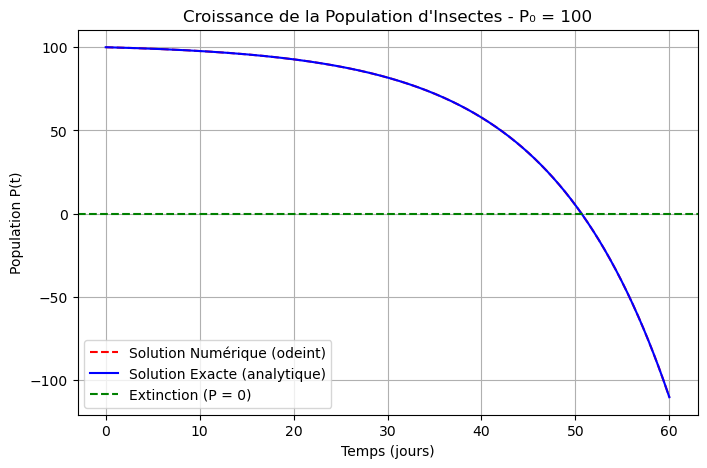

In [5]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

sy.init_printing()

# Définition de l'équation différentielle dP/dt = rP - 8
def PopGrowth(P, t):
    r = 0.0785  # Taux de croissance
    return r * P - 8

# Résolution exacte de l'équation différentielle
def ExactSol(time_arr, IC):
    t = sy.symbols('t')
    P = sy.Function('P')
    r = 0.0785  # Taux de croissance

    # Équation différentielle dP/dt = rP - 8
    diffEq = sy.Eq(P(t).diff(t), r * P(t) - 8)
    
    # Résolution avec condition initiale P(0) = IC
    solve = sy.dsolve(diffEq, P(t), ics={P(0): IC})
    
    # Convertir la solution symbolique en fonction Python utilisable
    func = sy.lambdify(t, solve.rhs, 'numpy')
    yvals = func(time_arr)
    
    return yvals

# Résolution numérique avec odeint
def NumericalSol(time_arr, IV):
    yvals = odeint(PopGrowth, IV, time_arr)
    return yvals.flatten()  # Conversion en tableau 1D pour compatibilité

# Condition initiale P(0) = 100
P0 = 100  # Population initiale
ts = np.linspace(0, 60, 1000)  # Temps de simulation (0 à 60 jours)

# Calcul des solutions
yexact = ExactSol(ts, P0)
ynum = NumericalSol(ts, P0)

# Tracé des résultats
plt.figure(figsize=(8, 5))

plt.plot(ts, ynum, label='Solution Numérique (odeint)', color='r', linestyle='--')
plt.plot(ts, yexact, label='Solution Exacte (analytique)', color='b')

# Ajout d'une ligne horizontale pour P = 0 (extinction)
plt.axhline(y=0, color='g', linestyle='--', label='Extinction (P = 0)')

plt.xlabel('Temps (jours)')
plt.ylabel('Population P(t)')
plt.title('Croissance de la Population d\'Insectes - P₀ = 100')
plt.legend()
plt.grid()
plt.show()

#### 2.2- ODEs - 2D Autonomous Equations
#### Example: Predator-prey equations (Modelling the populations of rabbits and foxes)
The predator-prey equations are a pair of coupled first-order non-linear ODEs thhst obey the following dynamical system:
\begin{cases} 
      \frac{d x}{t}= ax-bxy, \\
     \frac{d y}{t}=  -cy+dxy,  
   \end{cases}
 Where $a,b,c$ and $d$ are parameters, which are assumed to be positive.
 The numerical solution for such system with $x=1.5, y=1.0$ as initial conditions can be obtained as follows:

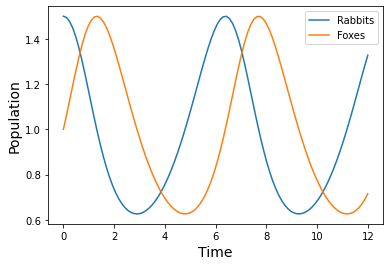

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def predprey(Z, t, a=1, b=1, c=1, d=1): # a,b,c,d optional arguments. 
    x, y = Z[0], Z[1]
    dxdt, dydt = x*(a - b*y), -y*(c - d*x)
    return [dxdt, dydt]
ts = np.linspace(0, 12, 100)
Z0 = [1.5, 1.0] # initial conditions for x and y 
Sol = odeint(predprey, Z0, ts, args=(1,1,1,1))
# use optional argument ’args’ to pass parameters to dZ_dt 
prey = Sol[:,0] # first column
predators = Sol[:,1] # second column

# Let’s plot ’rabbit’ and ’fox’ populations as a function of time
plt.plot(ts, prey, label="Rabbits")
plt.plot(ts, predators, label="Foxes")
plt.xlabel("Time", fontsize=14)
plt.ylabel("Population", fontsize=14)
plt.legend()

Normally such systems are represented by a `phase portrait` that is a geometric representation of the trajectories of the dynamical system in the `phase plane`.
a `phase plane` is a visual display of certain characteristics of certain kinds of differential equations; a coordinate plane with axes being the values of the two state variables, say (x, y), or (q, p) etc. 
So, the Phase plot for the above system (See black plot)  as well as when taking into account different initial conditions (See other colors plots) are as follows:

Text(0, 0.5, 'Foxes')

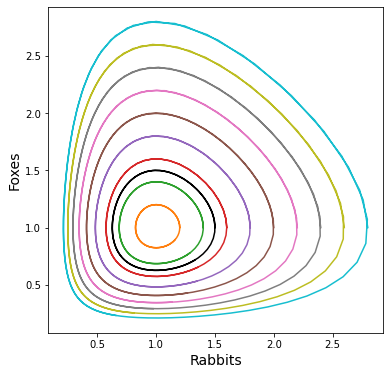

In [85]:
fig = plt.figure()
fig.set_size_inches(6,6) # Square plot, 1:1 aspect ratio 
ics = np.arange(1.0, 3.0, 0.2) # initial conditions
for r in ics:
    Z0 = [r, 1.0]
    Sol = odeint(predprey, Z0, ts)
    plt.plot(Sol[:,0], Sol[:,1])

Sol = odeint(predprey, [1.5, 1.0], ts)
plt.plot(Sol[:,0], Sol[:,1],color='black')
plt.xlabel("Rabbits", fontsize=14)
plt.ylabel("Foxes", fontsize=14)

### Challenge 4: 
We want to model the spread of a disease in a population using the so-called Susceptible-Infected-Removed (SIR) Epidemic model. A simple mathematical description of such model, which divides the (fixed) population of $N$ individuals into three "compartments" which may vary as a function of time, $t$:
<ul>
<li>$S(t)$ are those susceptible but not yet infected with the disease;
<li>$I(t)$ is the number of infectious individuals;
<li>$R(t)$ are those individuals who have recovered from the disease and now have immunity to it.
</ul>

The SIR model describes the change in the population of each of these compartments in terms of two parameters, $β$ and $γ$. $β$ describes the effective contact rate of the disease: an infected individual comes into contact with $βN$ other individuals per unit time (of which the fraction that are susceptible to contracting the disease is $S/N$). $γ$ is the mean recovery rate: that is, $1/γ$ is the mean period of time during which an infected individual can pass it on.

The differential equations describing this model is given bellow:

\begin{cases} 
     \frac{d S}{d t}=−\frac{βSI}{N}, \\
     \frac{d I}{d t}=\frac{βSI}{N} - γI, \\ 
     \frac{d R}{d t}= γI,
   \end{cases}
   
Comple The following Python code to integrates these equations for a disease characterised by parameters $β=0.2$, $1/γ=10$ days in a population of $N=1000$. The model is started with a single infected individual on day 0: I(0)=1. plot curves of $\frac{S(t)}{N}$, $\frac{I(t)}{N}$ and $\frac{R(t)}{N}$. 

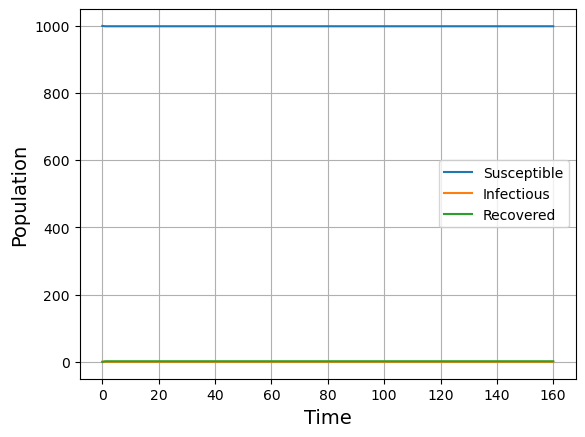

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
# A grid of time points (in days)
t = np.linspace(0, 160, 160)


# The SIR model differential equations.
def SIR_Deriv(y, t, N=1000, beta=0.2, gamma=1./10):
    S, I, R = y  # Déballer les variables
    dSdt = -beta * S * I / N  # Équation pour les susceptibles
    dIdt = beta * S * I / N - gamma * I  # Équation pour les infectés
    dRdt = gamma * I  # Équation pour les rétablis
    return [dSdt, dIdt, dRdt]


# Initial conditions vector
y0 = [S0, I0, R0]
# Integrate the SIR equations over the time grid, t.
sol = odeint(SIR_Deriv, y0, t, args=(beta, gamma, N))


S = sol[:, 0]  # Susceptibles
I = sol[:, 1]  # Infectés
R = sol[:, 2]  # Rétablis



plt.plot(t, S, label="Susceptible")
plt.plot(t, I, label="Infectious")
plt.plot(t, R, label="Recovered")
plt.xlabel("Time", fontsize=14)
plt.ylabel("Population", fontsize=14)
plt.legend()
plt.grid()
plt.show()

Plot the phase space of all the combination of the SIR system in The same axis plot
<ul>
<li> $S(t)$ with regards to $R(t)$
<li> $S(t)$ with regards to $I(t)$
<li> $R(t)$ with regards to $I(t)$
</ul>    



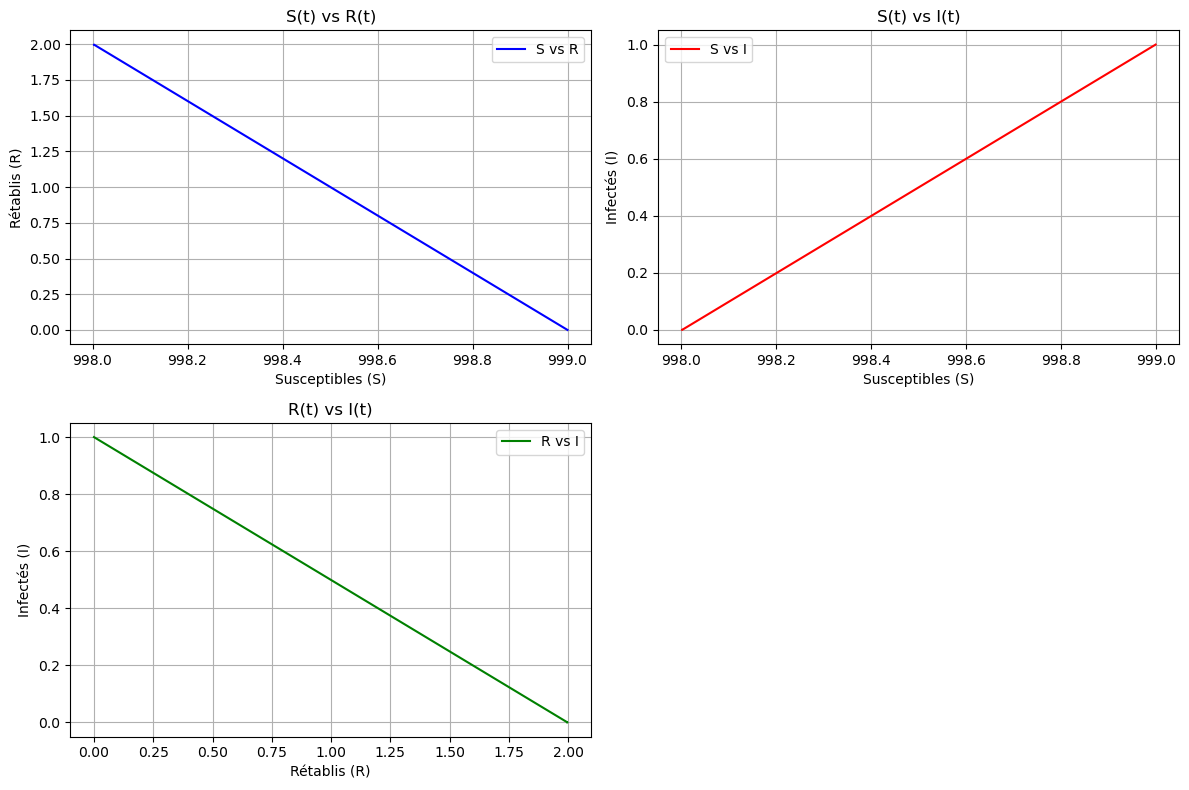

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(S, R, label='S vs R', color='blue')
plt.xlabel('Susceptibles (S)')
plt.ylabel('Rétablis (R)')
plt.title('S(t) vs R(t)')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(S, I, label='S vs I', color='red')
plt.xlabel('Susceptibles (S)')
plt.ylabel('Infectés (I)')
plt.title('S(t) vs I(t)')
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(R, I, label='R vs I', color='green')
plt.xlabel('Rétablis (R)')
plt.ylabel('Infectés (I)')
plt.title('R(t) vs I(t)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

#### ODEs - Second-Order Systems
#### Example:  The Van der Pol oscillator
We want to simulate and model the `Van der Pol` oscillator system seen in the cours. This system is a non-conservative oscillator with non-linear damping.  It evolves in time according to the following ODE:

$ \frac{d^2 x}{d t^2}-a\left(1-x^2(t)\right)\frac{d x}{d t}+x(t)=0$
 or
 
$\ddot{x}-a(1-x^2)\dot{x}+x=0$

The `Van der Pol` system is beiing used to model biological processes such as heart beat, circadian rhythms, biochemical oscillators, and pacemaker neuron...

To solve such 2nd ODE it has to be written as two coupled first-order equations, by introducing a new variable as follows:

\begin{cases} 
     \dot{x}=y, \\
     \dot{y}=a(1-x^2)y-x,  
   \end{cases}

Then, the numerical solution is as follows:

Text(0, 0.5, 'y')

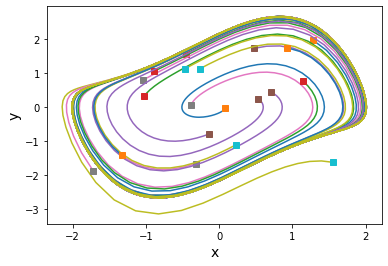

In [111]:
def Van_der_Pol (Z, t, a = 1.0): 
    x, y = Z[0], Z[1]
    dxdt = y
    dydt = a*(1-x**2)*y - x 
    return [dxdt, dydt]
def random_ic(scalefac=2.0): # stochastic initial condition 
    return scalefac*(2.0*np.random.rand(2) - 1.0)

ts = np.linspace(0.0, 40.0, 400)
nlines = 20
for ic in [random_ic() for i in range(nlines)]:
    Zs = odeint(Van_der_Pol, ic, ts)
    plt.plot(Zs[:,0], Zs[:,1])
    plt.plot([Zs[0,0]],[Zs[0,1]], 's') # plot the first point
    
plt.xlabel("x", fontsize =14)
plt.ylabel("y", fontsize =14)

Note that All curves tend towards a `limit cycle`.
a `limit cycle` is a closed trajectory in phase space having the property that at least one other trajectory spirals into it either as time approaches infinity or as time approaches negative infinity.
`Limit cycles` are important in many scientific applications such as:

<ul>
 <li>  Aerodynamic
 <li> The Hodgkin–Huxley model for action potentials in neurons.
 <li> The daily oscillations in gene expression, hormone levels and body temperature of animals, which are part of the circadian rhythm.
 <li>The migration of cancer cells in confining micro-environments
  <li> Some non-linear electrical circuits
</ul>

Now we investigate how the `limit cycle` varies with the parameter `a`:

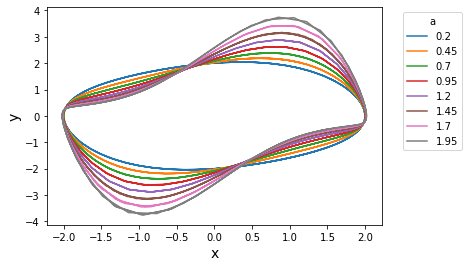

In [112]:
avals = np.arange(0.2, 2.1, 0.25) # parameters
minpt = int(len(ts) / 2) # look at late-time behaviour 

for a in avals:
    Zs = odeint(Van_der_Pol, random_ic(), ts, args=(a,))
    plt.plot(Zs[minpt:,0], Zs[minpt:,1], label=a)
    
plt.xlabel("x", fontsize =14)
plt.ylabel("y", fontsize =14)
plt.legend(title='a', bbox_to_anchor=(1.05, 1), loc='upper left')

### Challenge 5: 
We want to model and simulate the trajectory of a particle with mass $m=1.0kg$. Let $u=(x,y)$ encode the 2D position  of this particle.
The differential equation governing the motion of the particle is described using the Newton's second law of motion in classical mechanics. This law states that, in an inertial reference frame, the mass multiplied by the acceleration of the particle is equal to the sum of all forces applied to that particle. Here, we obtain:

$ \frac{d^2 u}{d t^2}=-\frac{k}{m}\frac{d u}{d t}+g$
 or
 
$\ddot{u}=-\frac{k}{m}\dot{u}+g$

Where $g=9.81$ is the gravity acceleration vector and $k$ is a drag coefficient.

Starting from an initial position, $u=[0,0]$, and initial speed vector $\dot{u}=[4.0,10.0]$ , simulate this second-order ODE with SciPy by first converting it to a first-order ODE. Note that your derivative function have to return  a vector of 2 states: v=[$\dot{u}$, $\ddot{u}$], where $\dot{u}$ and $\ddot{u}$ are the 1st and 2nd derivatives of $u$.  

Plot the results for 5 different values of $k$ of your choice

#### Hint
<ul>
 <li>Use a vector $v0=[0,0,4.,10.]$ to initialize $u$ and $\dot{u}$. This vector that stacks 4 components ([$u,\dot{u}$]) will be passed as an itital condition for the odeint function.
</ul>

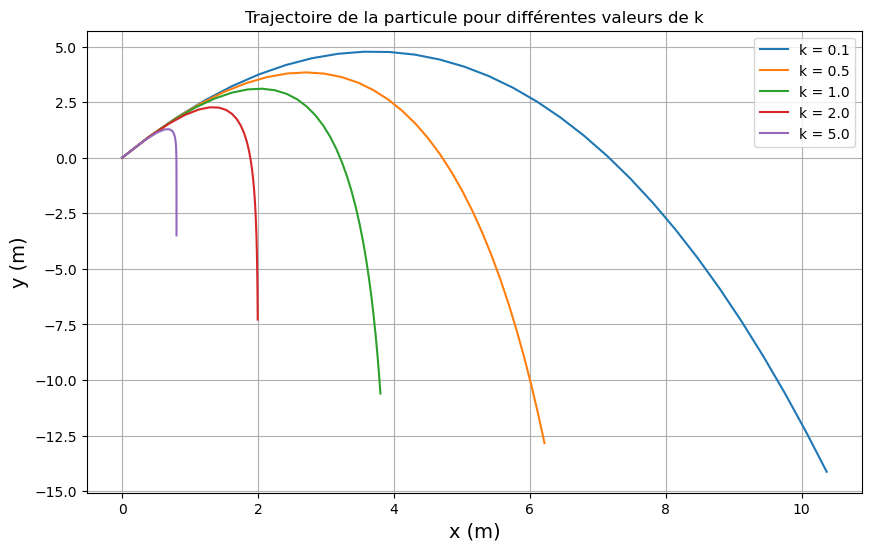

In [39]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

# Paramètres
m = 1.0  # Masse de la particule
g = 9.81  # Accélération due à la gravité

# Conditions initiales
v0 = np.zeros(4)  # [x(0), y(0), vx(0), vy(0)]
v0[2] = 4.0  # Vitesse initiale en x
v0[3] = 10.0  # Vitesse initiale en y

# Définition de la fonction de dérivée
def motion_derivative(v, t0, k):
    x, y, vx, vy = v  # Déballer les variables
    du_dt = [vx, vy]  # d(u)/dt = v
    dv_dt = [-k/m * vx, -k/m * vy - g]  # d(v)/dt = -k/m * v + g
    return np.r_[du_dt, dv_dt]

# Valeurs de k à tester
k_values = [0.1, 0.5, 1.0, 2.0, 5.0]

# Temps de simulation
t = np.linspace(0., 3., 30)

# Tracé des trajectoires pour chaque valeur de k
plt.figure(figsize=(10, 6))
for k in k_values:
    # Résolution numérique du système
    sol = spi.odeint(motion_derivative, v0, t, args=(k,))
    # Extraction des positions x et y
    x, y = sol[:, 0], sol[:, 1]
    # Tracé de la trajectoire
    plt.plot(x, y, label=f'k = {k}')

# Ajout des labels et de la légende
plt.xlabel("x (m)", fontsize=14)
plt.ylabel("y (m)", fontsize=14)
plt.title("Trajectoire de la particule pour différentes valeurs de k")
plt.legend()
plt.grid()
plt.show()